In [25]:
import pandas as pd
from matplotlib import pyplot as plt

In [26]:
shark_attacks = pd.read_csv('attacks.csv', encoding='ISO-8859-1') # o documento não veio com a codificação utf-8, assim foi necessario encontrar a codificação

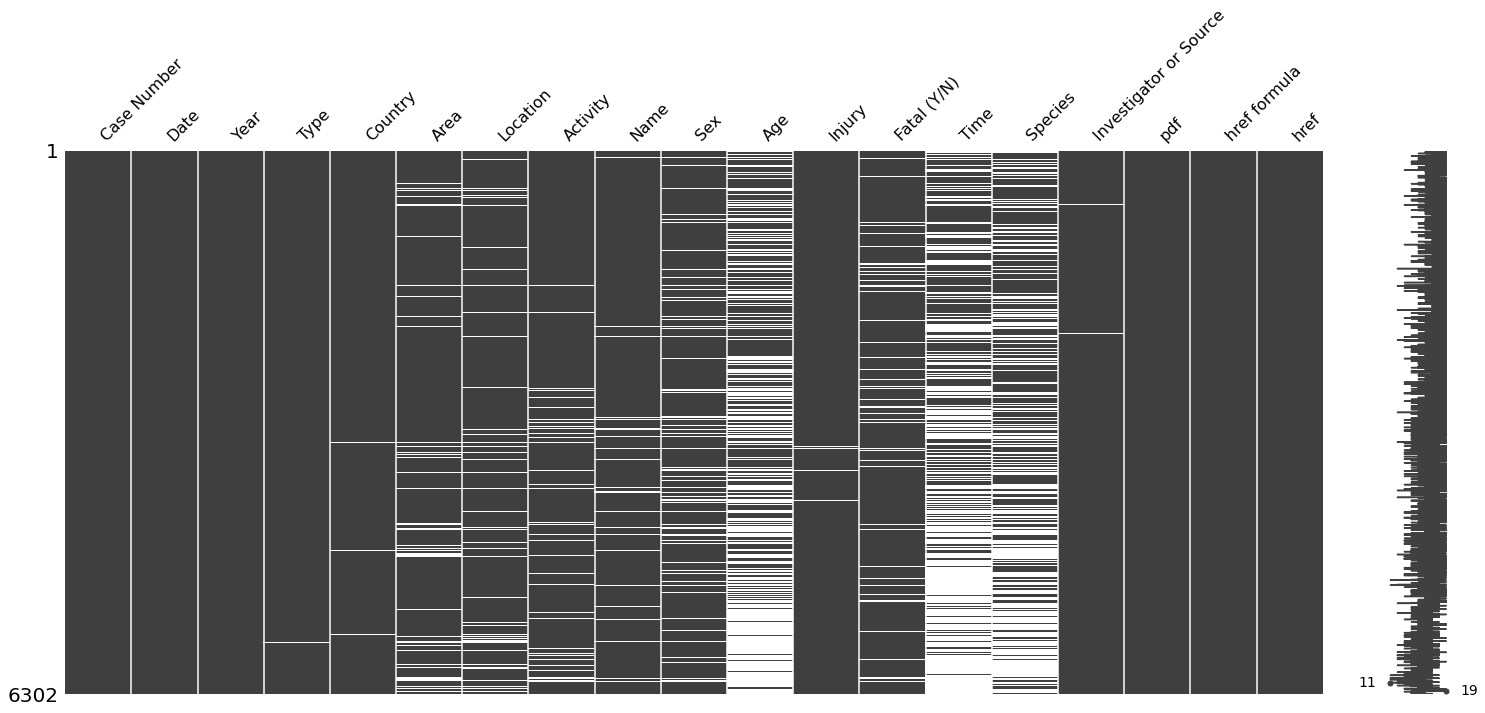

In [31]:
msno.matrix(shark_attacks)

In [28]:
shark_attacks = shark_attacks[0:6302]     # a partir daqui todos os dados são nulos 

In [4]:
shark_attacks.shape

(6302, 24)

In [30]:
shark_attacks.drop(columns=['Unnamed: 22','Unnamed: 23','Case Number.1','Case Number.2','original order'],inplace=True) #colunas nulas

In [6]:
#a partir daqui s dados perdem a numerção nd // 
case_number = []
for i in range (6302,0,-1):
    case_number.append('ND.%s' % (i))
 

In [7]:
shark_attacks['Case Number'] = case_number

In [8]:
shark_attacks['Year'] = shark_attacks['Year'].convert_dtypes()

In [9]:
shark_attacks.head(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href
0,ND.6302,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
1,ND.6301,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
2,ND.6300,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
3,ND.6299,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
4,ND.6298,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...


In [10]:
f = shark_attacks['Sex '].loc[(shark_attacks['Sex '] == 'F')].value_counts()
m = shark_attacks['Sex '].loc[(shark_attacks['Sex '] == 'M')].value_counts()
m
 

M    5094
Name: Sex , dtype: int64

<BarContainer object of 2 artists>

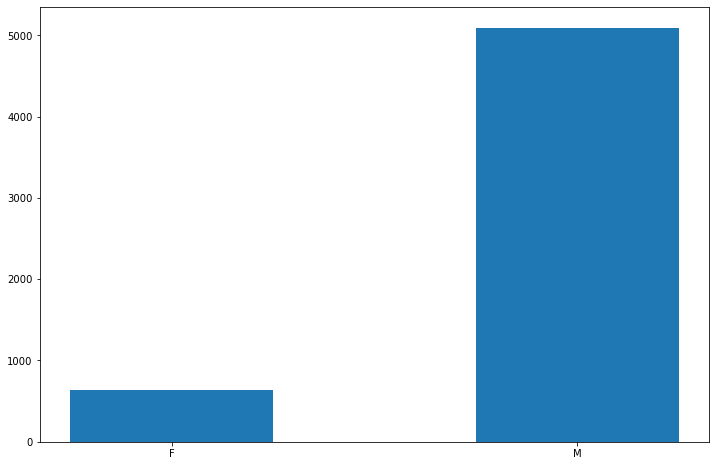

In [11]:
names = ['F','M']
values = [int(f),int(m)]

plt.figure(figsize=(12,8))
plt.bar(names, values,width=0.5)

In [12]:
y = shark_attacks['Fatal (Y/N)'].loc[(shark_attacks['Fatal (Y/N)'] == 'Y')].value_counts()
n = shark_attacks['Fatal (Y/N)'].loc[(shark_attacks['Fatal (Y/N)'] == 'N')].value_counts()

<BarContainer object of 2 artists>

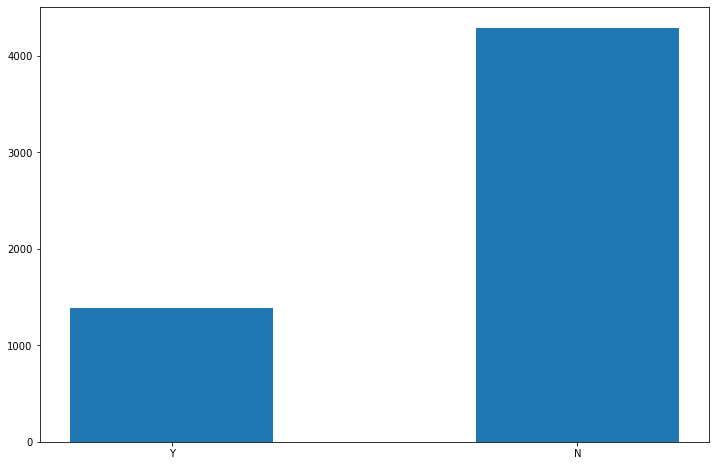

In [13]:
names = ['Y','N']
values = [int(y),int(n)]

plt.figure(figsize=(12,8))
plt.bar(names, values,width=0.5)


In [14]:
#numero de casos por ano
#numero de casos por especie

In [15]:
cases_per_year = pd.Series([shark_attacks['Year'][i] for i in range (0,6302)])
cpy = dict(cases_per_year.value_counts(sort=False))
cpy.pop(0)


125

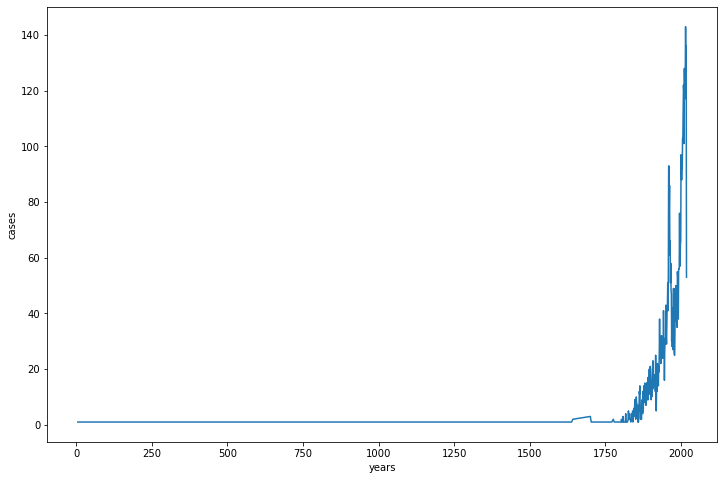

In [16]:
names = list(cpy.keys())
values = list(cpy.values())

plt.figure(figsize=(12,8))
plt.plot(names, values)
plt.ylabel('cases')
plt.xlabel('years')
plt.show()

In [17]:
import missingno as msno

In [19]:
import re

In [24]:
shark_attacks['Species '].value_counts()

White shark                                    665
Tiger shark                                    285
Not confirmed                                  244
Bull shark                                     178
Invalid                                        102
                                              ... 
4.9 m [16'] shark                                1
Possibly a  1.8 m [6'] Zambezi shark             1
2.5' shark                                       1
Raggedtooth shark, 1.5 to 2 m [5' to 6.75']      1
1' to 2' shark                                   1
Name: Species , Length: 564, dtype: int64

In [22]:
a = shark_attacks['Species ']

In [23]:
shark_attacks['Species '] = list(map(lambda x:re.sub('.*[Tt]iger.*','Tiger shark',x) if type(x) == str else x,a))
shark_attacks['Species '] = list(map(lambda x:re.sub('.*[Ww]hite.*','White shark',x) if type(x) == str else x,a))
shark_attacks['Species '] = list(map(lambda x:re.sub('.*[Nn]ot confirmed.*','Not confirmed',x) if type(x) == str else x,a))
shark_attacks['Species '] = list(map(lambda x:re.sub('.*[Hh]ammerhead.*','Hammerhead shark',x) if type(x) == str else x,a))
shark_attacks['Species '] = list(map(lambda x:re.sub('.*[Bb]ull.*','Bull shark',x) if type(x) == str else x,a))
shark_attacks['Species '] = list(map(lambda x:re.sub('.*[Bb]lue [Pp]ointer[s].*','Blue pointer',x) if type(x) == str else x,a))
shark_attacks['Species '] = list(map(lambda x:re.sub('.*[Ww]obbegong.*','Wobbegong shark',x) if type(x) == str else x,a))
shark_attacks['Species '] = list(map(lambda x:re.sub('.*[Bb]lacktip.*','Blacktip shark',x) if type(x) == str else x,a))
shark_attacks['Species '] = list(map(lambda x:re.sub('.*[Nn]urse.*','Nurse shark',x) if type(x) == str else x,a))
shark_attacks['Species '] = list(map(lambda x:re.sub('.*[Ss]pinner.*','Spinner shark',x) if type(x) == str else x,a))
shark_attacks['Species '] = list(map(lambda x:re.sub('.*[Ll]emon.*','Lemon shark',x) if type(x) == str else x,a))
shark_attacks['Species '] = list(map(lambda x:re.sub('.*[Rr]eef.*','Reef shark',x) if type(x) == str else x,a))
shark_attacks['Species '] = list(map(lambda x:re.sub('.*[Bb]ronze.*','Copper shark',x) if type(x) == str else x,a))
shark_attacks['Species '] = list(map(lambda x:re.sub('.*[Cc]opper.*','Copper shark',x) if type(x) == str else x,a))
shark_attacks['Species '] = list(map(lambda x:re.sub('.*[Mm]ako.*','Mako shark',x) if type(x) == str else x,a))
shark_attacks['Species '] = list(map(lambda x:re.sub('.*[Gg]alapagos.*','Galapagos shark',x) if type(x) == str else x,a))
shark_attacks['Species '] = list(map(lambda x:re.sub('.*[Bb]lue.*','Blue shark',x) if type(x) == str else x,a))
shark_attacks['Species '] = list(map(lambda x:re.sub('.*[Ii]nvolvement*','Not confirmed',x) if type(x) == str else x,a))
shark_attacks['Species '] = list(map(lambda x:re.sub('.*[Ss]mall*','Small shark',x) if type(x) == str else x,a))